# Solve IVPs with SciPy

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.integrate

from odezoo import backend, ivps

backend.select("numpy")

In [2]:
ivp_selection = [
    ivps.lotka_volterra(),
    ivps.rigid_body(),
    ivps.lorenz96(),
]

In [3]:
def solve_ivp(ivp, **kwargs):
    def fun(_, y, *args):
        return ivp.vector_field(y, *args)

    t_span = ivp.time_span
    y0 = ivp.initial_values
    args = ivp.vector_field_args

    solution = scipy.integrate.solve_ivp(fun=fun, t_span=t_span, y0=y0, args=args, **kwargs)

    plotgrid = np.linspace(*t_span)
    return plotgrid, solution.sol(plotgrid).T

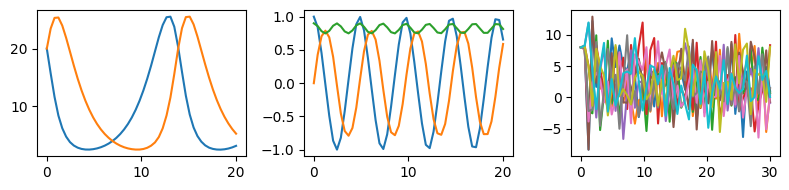

In [4]:
fig, axes = plt.subplots(ncols=len(ivp_selection), figsize=(8, 2), tight_layout=True)

for ax, ivp in zip(axes, ivp_selection):
    xs, ys = solve_ivp(ivp, dense_output=True)

    ax.plot(xs, ys)
plt.show()